## Setting the analytical solution
Make sure they agree with FLASH/flash.par setting

In [1]:
# import library
import numpy as np
import rclib.IO as rcIO # make sure the lib is linked to the same directory

second      = 1.
centimeter  = 1.
gram        = 1.
erg         = 1.

millisecond = 1.0e-3 * second
meter       = 1e2 * centimeter
kilometer   = 1e3 * meter

Gravitational_constant = 6.673e-8                   # CGS
light_speed            = 3e10 * centimeter / second # [cm s-1]

gamma       = 1.30
profilename = 'Yahil_Gam130.dat'

collapse_time     = 150 * millisecond
central_density   = 7.0e9*gram/(centimeter**3) # [g cm^-3]
central_pressure  = 6.0e27*erg/(centimeter**3)# [erg cm^-3]
core_radius_order = 4.98 # 10^order in [km]
number_element    = 128

kappa = central_pressure / pow( central_density, gamma )
radius = np.logspace(-1, core_radius_order, num=number_element) * kilometer # km

print('kappa =', kappa)

[X1D, D1D, V1D, M1D] = rcIO.IO_YahilProfile(profilename)

kappa = 953946015514834.6
Using YahilProfile/Yahil_Gam130.dat


## Read-in FLASH data

In [2]:
# 0 - initial or ID * 0.001s
fileID = 0

# data in
[ time, radius_1dx, dens_1dx, velx_1dx ] \
= rcIO.FLASH_IO_1D( '', 'yahil1d_hdf5_chk_', fileID, 'nodescribe' ) 

filename = yahil1d_hdf5_chk_0000
time = 0.0  s
variable.shape = grid( 2000 ) * sub( 1 ) =  (2000,)


## Plot data and analytical solution on same plot

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


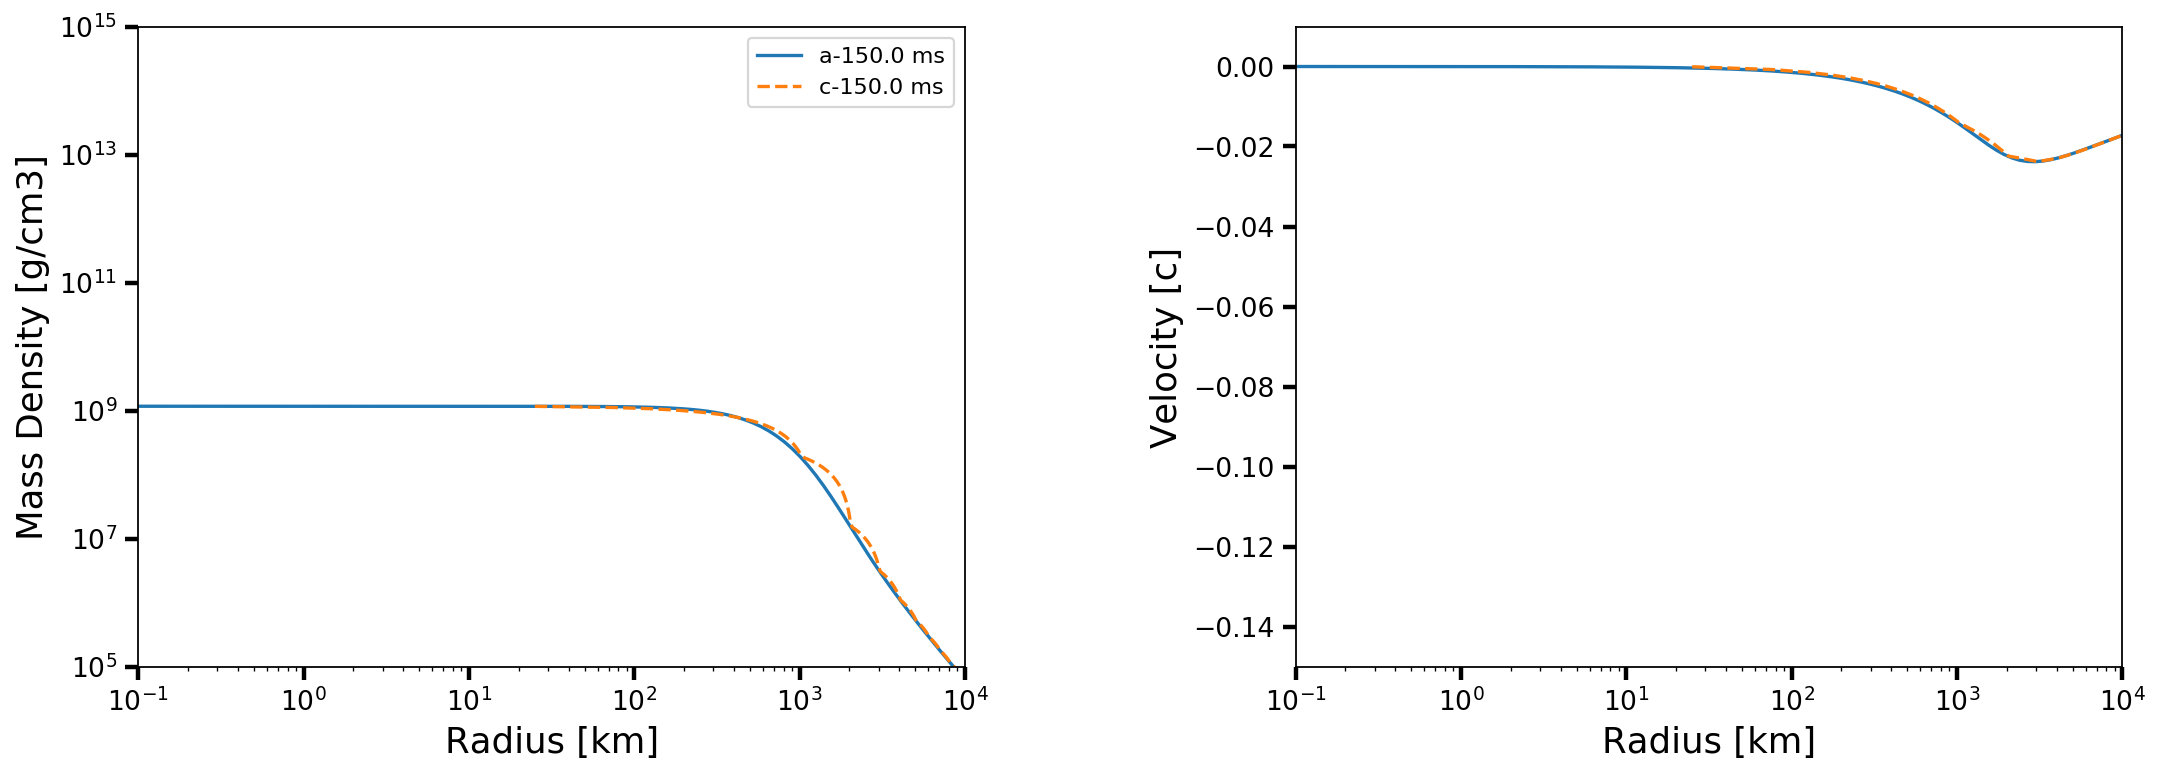

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(16, 8), dpi= 160, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 2.5, wspace= 0.4) # (hspace = .5, wspace=.001)

axs = axs.ravel()

test_time = [collapse_time - time* second]
#test_time = [51. * millisecond, 15. * millisecond, 5. * millisecond, \
#             1.5 * millisecond, 0.5* millisecond]
    
for mt in test_time:
    dimensionless_X = pow(kappa,-1/2) * pow(Gravitational_constant,(gamma-1)/2) \
    * radius * pow(mt,gamma-2)
    D_interp = np.interp(dimensionless_X, X1D, D1D)
    V_interp = np.interp(dimensionless_X, X1D, V1D)
    M_interp = np.interp(dimensionless_X, X1D, M1D)

    D = pow(Gravitational_constant,-1) * pow(mt,-2) * D_interp
    V = pow(kappa,1/2) * pow(Gravitational_constant,(1-gamma)/2) \
    * pow(mt,1-gamma) * V_interp
    
    ax1 = plt.subplot(121)
    plt.loglog(radius/kilometer, D,label='a-%.1f'%(mt*1e3)+' ms')
    plt.loglog(radius_1dx/kilometer, dens_1dx,'--',\
               label='c-%.1f'%(150-time*1e3)+' ms')
    
    ax2 = plt.subplot(122)
    plt.semilogx(radius/kilometer,V/light_speed)
    plt.semilogx(radius_1dx/kilometer, velx_1dx/light_speed,'--')

    
ax1 = plt.subplot(121)
plt.legend(loc='best')
plt.xlim((1e-1, 1e4))
plt.ylim((1e5, 1e15))
plt.xlabel('Radius [km]',fontsize=16)
plt.ylabel('Mass Density [g/cm3]',fontsize=16)
ax1.tick_params(direction='out', length=6, width=2, colors='k',
                grid_color='k', grid_alpha=0.5,labelsize = 12)
    
ax2 = plt.subplot(122)
plt.xlim((1e-1, 1e4))
plt.ylim((-0.15, 0.01))
plt.xlabel('Radius [km]',fontsize=16)
plt.ylabel('Velocity [c]',fontsize=16)
ax2.tick_params(direction='out', length=6, width=2, colors='k',
                grid_color='k', grid_alpha=0.5,labelsize = 12)


plt.subplots_adjust(bottom=0.25, top=0.75)
plt.show()